In [1]:
import cartopy.crs as ccrs
from cartopy.feature import OCEAN, LAKES
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import geopandas as gpd

In [2]:
italy_bbox = (6.117185, 36.230095, 18.817381, 47.623938)

In [3]:
# https://www.hydrosheds.org/page/hydrorivers
hydro_rivers = gpd.read_file("..\Data\HydroRIVERS_v10.gdb", 
                             driver='FileGDB', 
                             layer='HydroRIVERS_v10',
                             bbox=italy_bbox)

In [ ]:
line_sizes = hydro_rivers["ORD_STRA"]/4

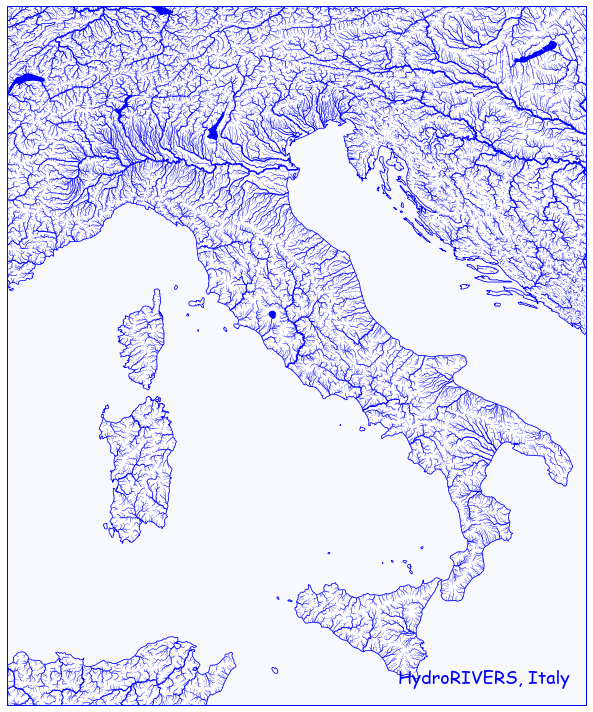

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams["font.family"] = "cursive"
ax.coastlines(color="blue", lw=0.8)
ax.add_feature(LAKES, color="blue")
ax.add_feature(OCEAN, color="ghostwhite")
hydro_rivers.plot(ax=ax, linewidth=line_sizes, color="blue")
ax.set_xlim(italy_bbox[0], italy_bbox[2])
ax.set_ylim(italy_bbox[1], italy_bbox[3])
for spine in ax.spines.values():
    spine.set_edgecolor('blue')
    spine.set_linewidth(1)
text_box = AnchoredText("HydroRIVERS, Italy",
                        prop=dict(size=18,
                                  color="blue",
                                  ha="center"),
                        frameon=False, 
                        loc=4)
plt.gca().add_artist(text_box)
plt.tight_layout()
plt.savefig(r"09_Blue.png", dpi=300)